In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

In [2]:
# #############################################################################
# Real benchmarked dataset
#data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
data = pd.read_csv('../../RealData/RealData_haproxy_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')




In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.1,49192.75
1,1,0.1,50082.85
2,2,0.1,49936.27
3,3,0.1,49879.74
4,4,0.1,47800.17


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,800.0000,800.000000,800.000000
mean,399.5000,0.550000,391121.643500
std,231.0844,0.287408,223930.035609
min,0.0000,0.100000,47112.290000
25%,199.7500,0.300000,202593.722500
50%,399.5000,0.550000,367637.085000
75%,599.2500,0.800000,581665.452500
max,799.0000,1.000000,786490.510000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
Unnamed: 0    800 non-null int64
CPU           800 non-null float64
throughput    800 non-null float64
dtypes: float64(2), int64(1)
memory usage: 18.8 KB


In [6]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

rf = RandomForestRegressor(n_estimators=2, min_weight_fraction_leaf=0.02)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.02, n_estimators=2, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
#Test data prediction
prediction = rf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.003743,0.1,0.1
1,0.001760,0.1,0.1
2,0.004014,0.1,0.1
3,0.002768,0.1,0.1
4,0.005136,0.1,0.1
5,0.004824,0.1,0.1
6,0.001811,0.1,0.1
7,0.003846,0.1,0.1
8,0.005045,0.1,0.1
9,0.001817,0.1,0.1


MAE: 0.003507898351648457
MSE: 0.0003177855369218685
RMSE: 0.017826540239818507
R^2: 0.9962029956009634


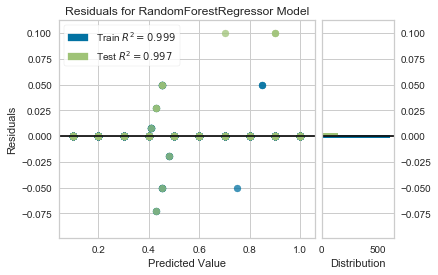

In [8]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2:',metrics.r2_score(y_test, prediction))
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()    


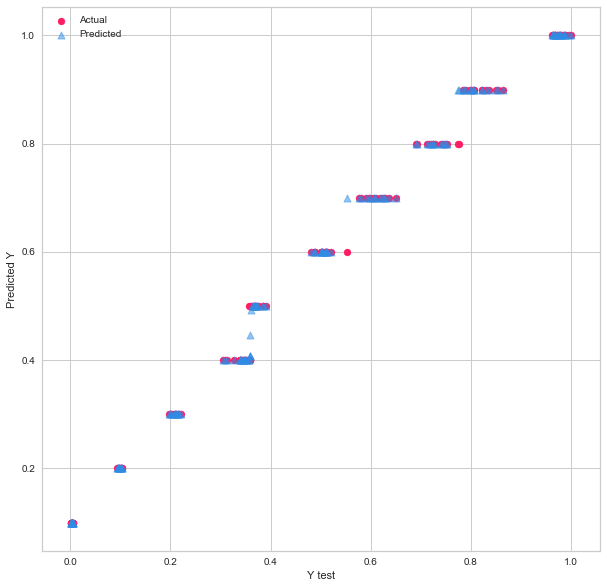

In [9]:
#Plot prediction
fig = plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test,  color='#fe1c64',label="Actual")
plt.scatter(X_test, prediction, color='#2e8de6', linewidth=1,marker='^',alpha = 0.5,label="Predicted")
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.legend()

In [10]:
# save the model to disk
filename = '../models/rf_haproxy_big_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [11]:
rf.predict([[0.2243476]])

array([0.3])